In [145]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


import xgboost as xgb

In [100]:
os.chdir(r"C:\Users\Will\Desktop\School\ISYE 6203\Group Project")

In [101]:
health_data = pd.read_csv("health_data.csv")

In [102]:
health_data.drop(columns=["PatientID"],inplace=True)
diabetes = health_data["Diabetes"].map({"Yes":1,"No":0}) 
health_data = health_data.drop(columns=["Diabetes"])
# for cols in health_data.columns:
#     if (health_data.dtypes[cols]) == "object":
#        health_data[cols] =health_data[cols].astype("category")

health_data[["blood_pressure_num","blood_pressure_den"]] = health_data['BloodPressure'].str.split('/', expand=True).astype(float)

health_data = pd.get_dummies(health_data, drop_first=True).rename(columns={"Outcome_At Risk":"Outcome_At_Risk"})

In [103]:
X = health_data
y = diabetes

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.20,  
                                   shuffle=True) 

In [77]:
rf =RandomForestClassifier(    n_estimators=100,       # Equivalent to num.trees = 100
    max_features=3,         # Equivalent to mtry = 3
    class_weight='balanced', # Not in the R code, but useful for imbalanced datasets
    random_state=42,        # Set a random seed for reproducibility
    n_jobs=-1,              # Use all available cores for parallel processing
    oob_score=True          # Optional: To get the out-of-bag error
)

In [78]:
rf.fit(X_train,y_train)

y_pred = rf.predict_proba(X_test)

In [79]:
y_pred   

array([[0.85, 0.15],
       [0.81, 0.19],
       [0.83, 0.17],
       ...,
       [0.88, 0.12],
       [0.85, 0.15],
       [0.86, 0.14]])

In [94]:
y_pred_binary = [1 if pred > .8 else 0 for pred in y_pred[:,1]]

c:\Users\Will\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8482166666666666
Precision: 0.0
Recall: 0.0


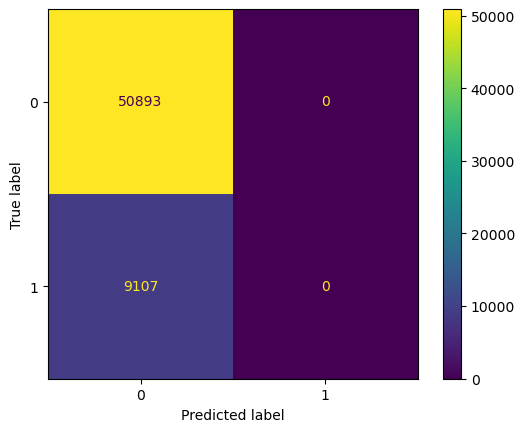

In [95]:
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
cm= confusion_matrix(y_test, y_pred_binary)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

In [91]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)


<AxesSubplot:>

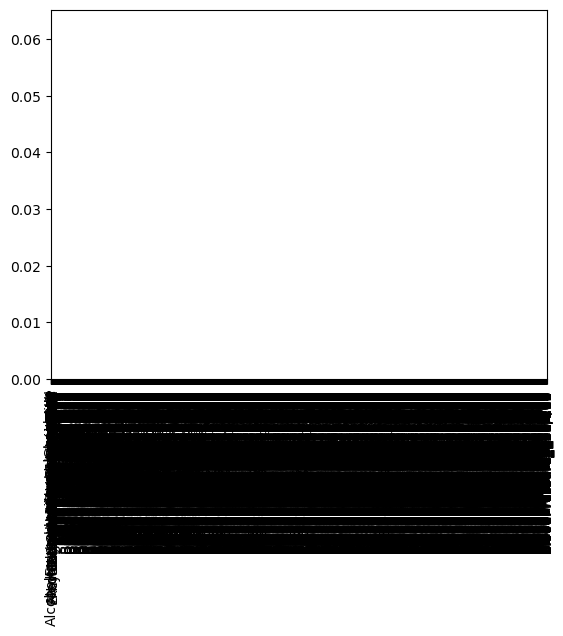

In [92]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_importances.plot.bar()

In [106]:
lr = LogisticRegression(solver='saga', class_weight='balanced',random_state=101)
lr.fit(X_train, y_train)

c:\Users\Will\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  n_samples,


LogisticRegression(class_weight='balanced', random_state=101, solver='saga')

In [107]:
y_pred = lr.predict_proba(X_test)

In [113]:
y_pred_binary = [1 if pred > .5 else 0 for pred in y_pred[:,1]]

In [116]:
f1_test = f1_score(y_test, y_pred_binary)
print('The f1 score for the testing data:', f1_test)

The f1 score for the testing data: 0.22998742665549038


In [137]:
def create_binary(pred_obj,threshold):
    x = [1 if pred > threshold else 0 for pred in pred_obj[:,1]]
    return x

Accuracy: 0.5100666666666667
Precision: 0.1510199869276549
Recall: 0.4820467772043483


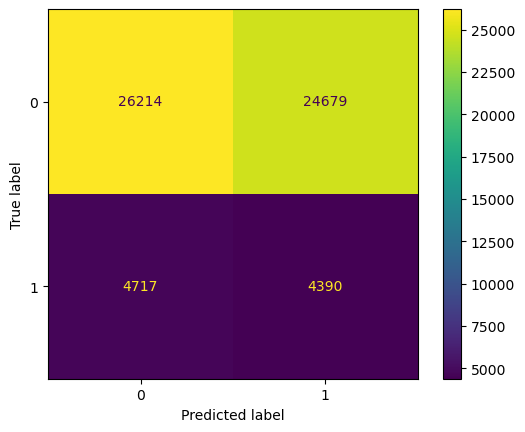

In [115]:
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
cm= confusion_matrix(y_test, y_pred_binary)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

<AxesSubplot:>

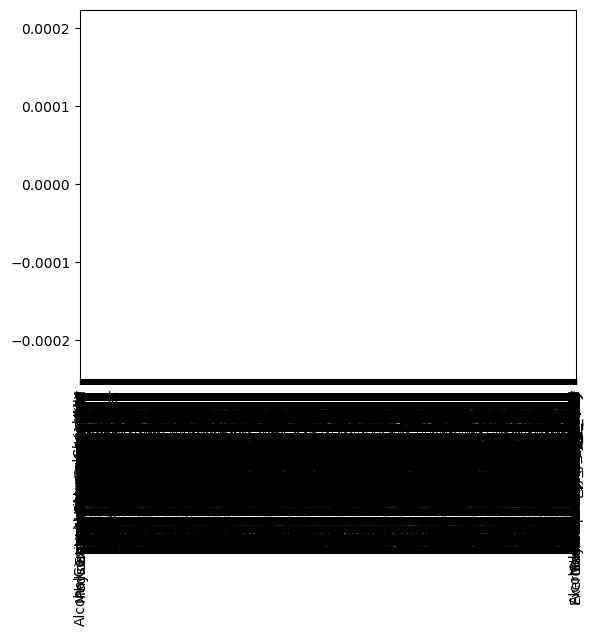

In [119]:
feature_importances = pd.Series(lr.coef_[0], index=X_train.columns).sort_values(ascending=False)

feature_importances.plot.bar()

In [125]:
dir(lr)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_features_in_',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'verbose',
 'w

In [132]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
predict_proba

In [135]:
y_pred = clf.predict_proba(X_test)

In [142]:
y_brinary =create_binary(y_pred,.7)

In [143]:
print(f"Accuracy: {accuracy_score(y_test, y_brinary)}")

Accuracy: 0.8482


Accuracy: 0.8482
Precision: 0.0
Recall: 0.0


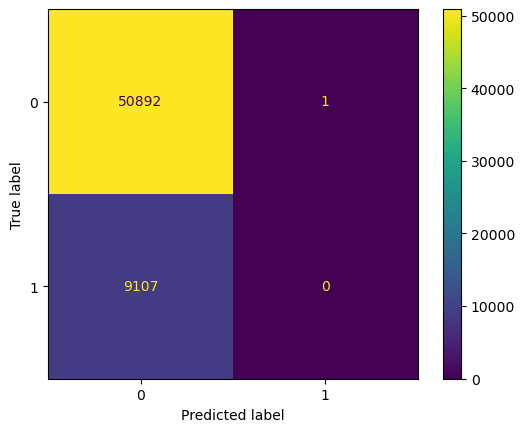

In [144]:
accuracy = accuracy_score(y_test, y_brinary)
precision = precision_score(y_test, y_brinary)
recall = recall_score(y_test, y_brinary)
cm= confusion_matrix(y_test, y_brinary)
f1_test = f1_score(y_test, y_pred_binary)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print('The f1 score for the testing data:', f1_test)

In [ ]:
regr = RandomForestRegressor(n_estimators=100, random_state=42)
regr.fit(X_train, y_train)

In [ ]:
y_pred_1 = regr.predict_proba(X_test)